In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix,classification_report,precision_recall_curve
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("breast cancer.csv",index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df = df.drop(['Unnamed: 32'],axis=1)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

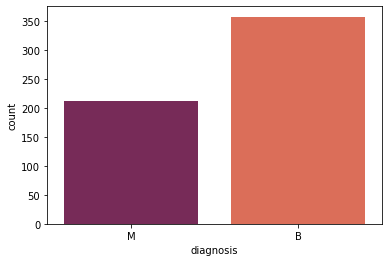

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis',data=df,palette='rocket')

In [5]:
scaler = StandardScaler()
X = df.drop('diagnosis', axis=1)
X_scaled = scaler.fit_transform(X)

In [6]:
pca = PCA()
pca.fit_transform(X_scaled)

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

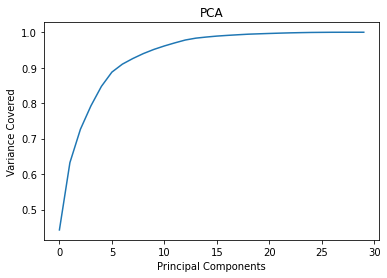

In [7]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

In [8]:
pca = PCA(n_components=13)
new_pcomp = pca.fit_transform(X_scaled)
princi_comp = pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC7','PC9','PC10','PC11','PC12','PC13'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC7,PC9,PC10,PC11,PC12,PC13
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157119,-0.877403,0.262954,-0.859010,0.103387
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240989,-0.711906,1.106994,0.813118,0.157926,-0.943527
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668167,0.097374,0.024065,0.454276,-0.605603,0.124383,-0.410623
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059566,-1.405441,-1.116975,-1.151514,1.011314,-0.933264
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377705,0.651360,-0.110516,0.387945
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,-0.062650,0.123338,-0.051720
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,0.244804,0.222752,-0.192638
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393916,0.520877,-0.840513,0.096474,0.157423
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280238,-0.542037,-0.089296,-0.178629,-0.697465,1.225207


In [9]:
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})

In [10]:
y = df['diagnosis']

In [11]:
x_train,x_test,y_train,y_test = train_test_split(princi_comp,y,test_size = 0.25, random_state= 355)

clf = LogisticRegression()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [12]:
print (classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        93
           1       1.00      0.94      0.97        50

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



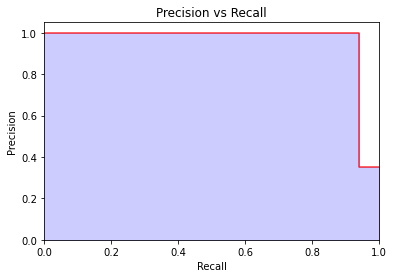

In [13]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.step(recall, precision, color='r', alpha=0.8,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

In [14]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[93,  0],
       [ 3, 47]], dtype=int64)

In [15]:
tp = cfm[0,0]
fp = cfm[0,1]
fn = cfm[1,0]
tn = cfm[1,1]
print ('True Positive  >', tp)
print ('False Positive >', fp)
print ('False Negetive >', fn)
print ('True Negetive  >', tn)

True Positive  > 93
False Positive > 0
False Negetive > 3
True Negetive  > 47


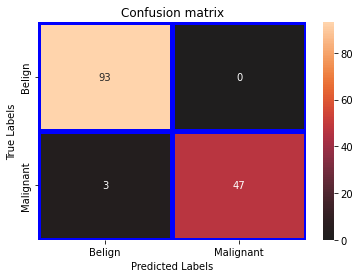

In [16]:
ax=plt.subplot()
sns.heatmap(cfm,annot=True,ax=ax,linewidths=5,linecolor='b',center=0)
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['Belign','Malignant'])
ax.yaxis.set_ticklabels(['Belign','Malignant'])
plt.show()

In [17]:
print ('Final prediction >', round((tp+tn)/(len(y_pred))*100,2))

Final prediction > 97.9
